In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.integrate import quad
import pandas as pd

In [2]:
def Complexity_GS(t1, t2):
    return 1/2 - (t1 + t2 - np.abs(t1 - t2))/(2*np.pi*t1)     

In [3]:
t1 = np.arange(0.001, 1,0.005)
t2 = np.arange(0.001, 1,0.005)
x, y = np.meshgrid(t1,t2)
C_GS = Complexity_GS(x,y)

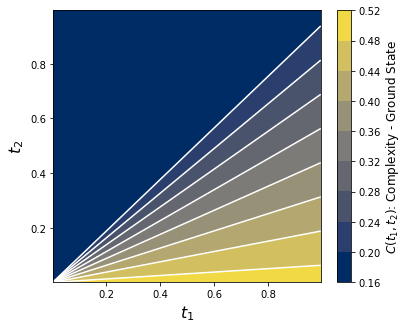

In [4]:
fig = plt.figure(figsize=(6,5))
plt.contourf(x, y, C_GS,cmap=plt.cm.cividis)
#plt.plot([0,1],[0,1], c = "w")
plt.ylabel(r'$ t_{2} $', fontsize= 16)
plt.xlabel(r'$ t_{1} $', fontsize= 16)
#plt.xlim(0,1)
#plt.ylim(0,1)
cbar = plt.colorbar()
cbar.set_label(r'$C(t_{1},t_{2})$' + ': Complexity - Ground State', fontsize= 12)
plt.contour(x, y, C_GS, colors = "w")

In [5]:
def R_i(k):
    global t1_i,t2_i
    t1 = t1_i
    t2 = t2_i
    return np.sqrt(t1**2 +t2**2 -2*t1*t2*np.cos(k))
    
def R_f(k):
    global t1_f,t2_f
    t1 = t1_f
    t2 = t2_f
    return np.sqrt(t1**2 +t2**2 -2*t1*t2*np.cos(k))

def integrando(k):
    global t1_i,t2_i,t1_f,t2_f,t
    return (t1_f*t2_i - t1_i*t2_f)**2*np.sin(k)**2*np.sin(R_f(k)*t)**2/(R_f(k)**2*R_i(k)**2)

In [6]:
t1_i,t2_i = 1,0.2
t1_f,t2_f = 0.7, 1.5
tiempos = np.linspace(0,50,1000)
integral1 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral1 = np.append(integral1, valor)
    
Etiqueta1 = r'$(t_{1},t_{2}) = (1,0.2) \rightarrow (t_{1},t_{2}) = (0.7,1.5)$' + ': Trivial Phase -> Topological Phase'

t1_i,t2_i = 0.7, 1.5
t1_f,t2_f = 1,0.2
tiempos = np.linspace(0,50,1000)
integral2 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral2 = np.append(integral2, valor)
    
Etiqueta2 = r'$(t_{1},t_{2}) = (0.7,1.5) \rightarrow (t_{1},t_{2}) = (1,0.2)$' + ': Topological Phase -> Trivial Phase'

(0.0, 50.0)

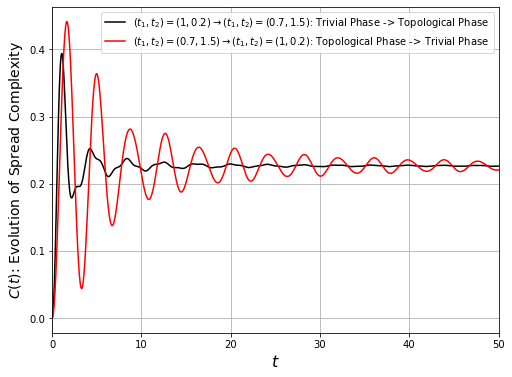

In [7]:
fig = plt.figure(figsize = (8,6))
plt.plot(tiempos,integral1, c = "black", label = Etiqueta1)
plt.plot(tiempos,integral2, c = "red", label = Etiqueta2)
plt.grid()
plt.ylabel(r'$C(t)$' + ': Evolution of Spread Complexity', fontsize= 14)
plt.xlabel(r'$ t $', fontsize= 16)
plt.legend()
plt.xlim(0,50)

#### Veamos que sucede si cambio los signos de t2.

In [8]:
t1_i,t2_i = 1,-0.2
t1_f,t2_f = 0.7, -1.5
tiempos = np.linspace(0,50,1000)
integral3 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral3 = np.append(integral3, valor)
    
Etiqueta3 = r'$(t_{1},t_{2}) = (1,-0.2) \rightarrow (t_{1},t_{2}) = (0.7,-1.5)$' + ': Trivial Phase -> Topological Phase'

t1_i,t2_i = 0.7, -1.5
t1_f,t2_f = 1,-0.2
tiempos = np.linspace(0,50,1000)
integral4 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral4 = np.append(integral4, valor)
    
Etiqueta4 = r'$(t_{1},t_{2}) = (0.7,-1.5) \rightarrow (t_{1},t_{2}) = (1,-0.2)$' + ': Topological Phase -> Trivial Phase'

(0.0, 50.0)

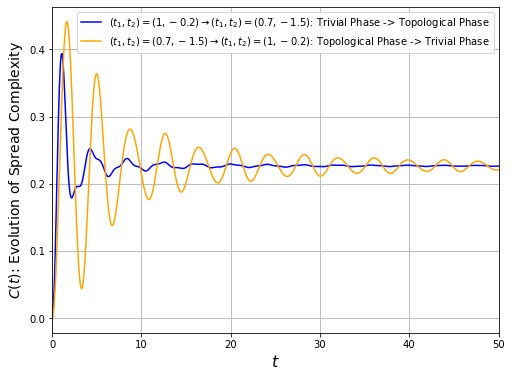

In [9]:
fig = plt.figure(figsize = (8,6))
plt.plot(tiempos,integral3, c = "blue", label = Etiqueta3)
plt.plot(tiempos,integral4, c = "orange", label = Etiqueta4)
plt.grid()
plt.ylabel(r'$C(t)$' + ': Evolution of Spread Complexity', fontsize= 14)
plt.xlabel(r'$ t $', fontsize= 16)
plt.legend()
plt.xlim(0,50)

#### Nada, da igual si t2 es positivo o negativo.

(0.0, 50.0)

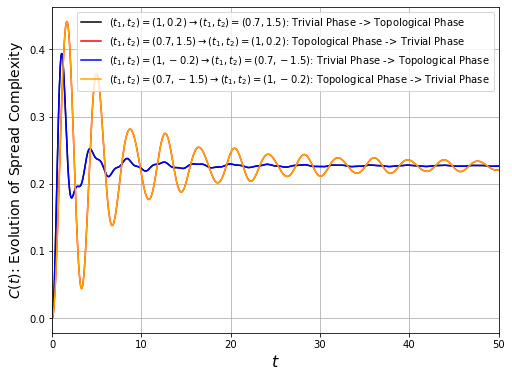

In [10]:
fig = plt.figure(figsize = (8,6))
plt.plot(tiempos,integral1, c = "black", label = Etiqueta1)
plt.plot(tiempos,integral2, c = "red", label = Etiqueta2)
plt.plot(tiempos,integral3, c = "blue", label = Etiqueta3)
plt.plot(tiempos,integral4, c = "orange", label = Etiqueta4)
plt.grid()
plt.ylabel(r'$C(t)$' + ': Evolution of Spread Complexity', fontsize= 14)
plt.xlabel(r'$ t $', fontsize= 16)
plt.legend()
plt.xlim(0,50)

In [11]:
def C_tlargos(alpha,beta):
    termino1 = (alpha - beta)/(8*alpha*beta)
    termino3 = (alpha*(beta+1)*np.abs(beta -1) - beta*(alpha+1)*np.abs(alpha-1))/(1-alpha*beta)
    termino2 = beta - alpha + termino3
    return termino1*termino2

In [12]:
arctan_alpha = np.arange(0.001, 1.5,0.005)
arctan_beta = np.arange(0.001, 1.5,0.005)
x, y = np.meshgrid(arctan_alpha, arctan_beta)
C_tinf = C_tlargos(np.tan(x),np.tan(y))

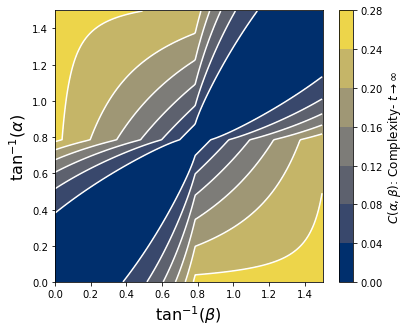

In [13]:
fig = plt.figure(figsize=(6,5))
plt.contourf(x, y, C_tinf,cmap=plt.cm.cividis)
plt.ylabel(r'$ \tan^{-1} (\alpha) $', fontsize= 16)
plt.xlabel(r'$ \tan^{-1} (\beta) $', fontsize= 16)
plt.xlim(0,1.5)
plt.ylim(0,1.5)
cbar = plt.colorbar()
cbar.set_label(r'$C(\alpha, \beta)$' + ': Complexity' r'- $t \rightarrow \infty$', fontsize= 12)
plt.contour(x, y, C_tinf,colors = "w")

#### Hasta aca replique el artículo. Sin embargo, ahora probaré a ver si la notación que ellos usan con un "-" que yo no puse en la tesis si tiene sentido:

In [2]:
def H_t1_t2_opcion1(t1,t2):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = -t2 #1 + delta #la que aparece despues - en este caso sería -t2
    c = t1 #1 - delta #la que aparece primero - en este caso sería t1

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b
            
    #Matriz[0,N-1] = b
    #Matriz[N-1,0] = b
            
    return np.linalg.eigvals(Matriz)  

Text(0, 0.5, '$\\lambda_{\\pm}$')

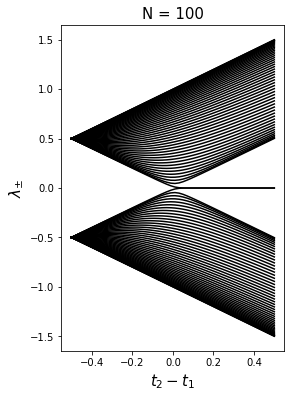

In [3]:
t1 = 0.5
t2 = np.linspace(0,1,50)

N = 100

for j in range(len(t2)):
    lambda_k = np.sort(H_t1_t2_opcion1(t1, t2[j]))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(t2 - t1, Valores_Propios[i], c = "black")  

plt.title("N = 100", fontsize= 15)
plt.xlabel(r'$t_{2} - t_{1}$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}$', fontsize= 15)

# Veamos que sucede si cambia ese menos, en teoría así está lo de mi tesis.

In [16]:
def H_t1_t2_opcion2(t1,t2):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = t2 #1 + delta #la que aparece despues - en este caso sería -t2
    c = t1 #1 - delta #la que aparece primero - en este caso sería t1

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b
            
    #Matriz[0,N-1] = b
    #Matriz[N-1,0] = b
            
    return np.linalg.eigvals(Matriz)  

Text(0, 0.5, '$\\lambda_{\\pm}$')

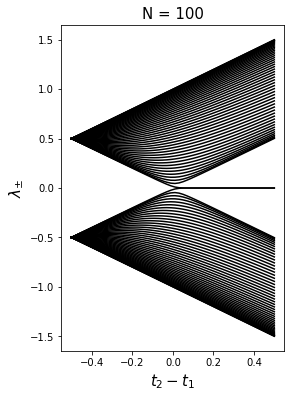

In [17]:
t1 = 0.5
t2 = np.linspace(0,1,50)

N = 100

for j in range(len(t2)):
    lambda_k = np.sort(H_t1_t2_opcion1(t1, t2[j]))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(t2 - t1, Valores_Propios[i], c = "black")  
plt.title("N = 100", fontsize= 15)
plt.xlabel(r'$t_{2} - t_{1}$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}$', fontsize= 15)

#### La gráfica da exactamente igual, en ambos casos lo importante es que t2 sea mayor que t1. Cambiar el signo de t2 no afecta en nada a los valores propios.

#### Efectivamente su notación y sus signos también funcionan, usemos su notación y todo para tratar de construir la base de Krylov.

In [2]:
def H_t1_t2(t1,t2):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = -t2 #1 + delta #la que aparece despues - en este caso sería -t2
    c = t1 #1 - delta #la que aparece primero - en este caso sería t1

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b
            
    #Matriz[0,N-1] = b
    #Matriz[N-1,0] = b
            
    return Matriz  

def Diagonalizar(Matriz):
    eig_vals, eig_vecs = np.linalg.eig(Matriz)
    eig_vals_sorted = np.sort(eig_vals)
    eig_vecs_sorted = eig_vecs[:, eig_vals.argsort()]
    D = np.identity(N)*eig_vals_sorted
    Q = np.asmatrix(eig_vecs_sorted)

    return D, Q, np.asmatrix(Matriz)

### Extra:

In [ ]:
def amplitudes(delta, J = 1):
    t1 = J*(1-delta)
    t2 = J*(1+delta) 
    return t1,t2

In [ ]:
t1_i,t2_i = amplitudes(0.5)
t1_f,t2_f = amplitudes(-0.5)
tiempos = np.linspace(0,50,1000)
integral3 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral3 = np.append(integral3, valor)
Etiqueta3 = r'$\delta_{i} = 0.5 \rightarrow \delta_{f} = -0.5$'

In [ ]:
t1_i,t2_i = amplitudes(-0.5)
t1_f,t2_f = amplitudes(0.5)
tiempos = np.linspace(0,50,1000)
integral4 = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(integrando, 0, np.pi)[0]/(np.pi)
    integral4 = np.append(integral4, valor)
Etiqueta4 = r'$\delta_{i} = -0.5 \rightarrow \delta_{f} = 0.5$'

(0.0, 50.0)

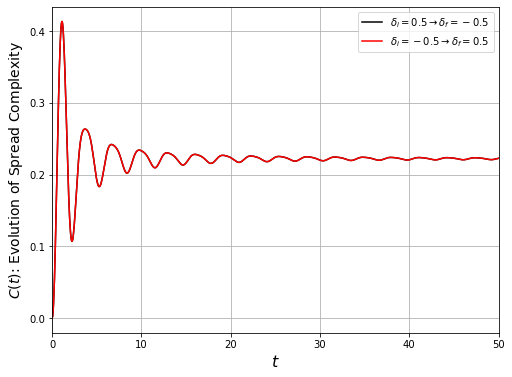

In [ ]:
fig = plt.figure(figsize = (8,6))
plt.plot(tiempos,integral3, c = "black", label = Etiqueta3)
plt.plot(tiempos,integral4, c = "red", label = Etiqueta4)
plt.grid()
plt.ylabel(r'$C(t)$' + ': Evolution of Spread Complexity', fontsize= 14)
plt.xlabel(r'$ t $', fontsize= 16)
plt.legend()
plt.xlim(0,50)